In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/15424480096_45bb574b33.jpg'),
 PosixPath('datasets/flower_photos/roses/7147367479_f7a6ef0798.jpg'),
 PosixPath('datasets/flower_photos/roses/12407768513_3440238148_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4061451210_1650590c6a.jpg'),
 PosixPath('datasets/flower_photos/roses/15977362155_461030c196_m.jpg')]

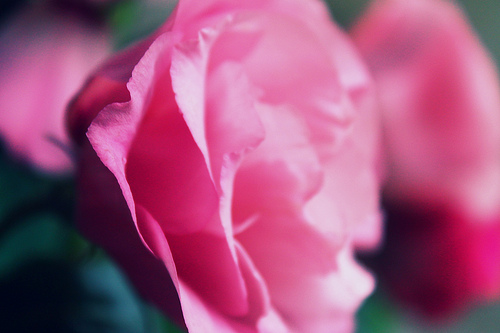

In [7]:
PIL.Image.open(str(roses[1]))

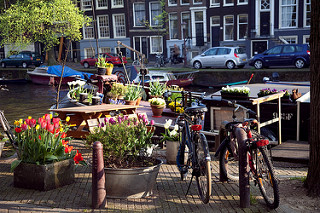

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/15424480096_45bb574b33.jpg'

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[169, 140, 185],
        [170, 142, 185],
        [171, 143, 186],
        ...,
        [ 93,  82, 155],
        [ 88,  77, 149],
        [ 86,  75, 145]],

       [[169, 140, 185],
        [170, 142, 185],
        [171, 143, 186],
        ...,
        [ 92,  82, 152],
        [ 87,  78, 145],
        [ 84,  76, 141]],

       [[170, 141, 186],
        [170, 141, 186],
        [171, 143, 186],
        ...,
        [ 92,  83, 150],
        [ 87,  79, 142],
        [ 84,  77, 138]],

       ...,

       [[205, 170, 204],
        [203, 170, 204],
        [202, 169, 204],
        ...,
        [225, 198, 224],
        [213, 184, 217],
        [205, 174, 211]],

       [[203, 170, 204],
        [202, 169, 203],
        [202, 169, 203],
        ...,
        [222, 194, 223],
        [210, 180, 215],
        [204, 170, 210]],

       [[203, 170, 204],
        [202, 169, 203],
        [201, 168, 202],
        ...,
        [222, 191, 222],
        [210, 177, 214],
        [202, 168, 209]]

In [13]:
img.shape

(333, 500, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
X_train_scaled[0]

array([[[0.08235294, 0.2627451 , 0.17647059],
        [0.08627451, 0.27058824, 0.18431373],
        [0.09019608, 0.2745098 , 0.18823529],
        ...,
        [0.05098039, 0.22352941, 0.15686275],
        [0.05882353, 0.22352941, 0.15686275],
        [0.05098039, 0.21568627, 0.14901961]],

       [[0.09019608, 0.27058824, 0.18431373],
        [0.09019608, 0.2745098 , 0.18823529],
        [0.09411765, 0.27843137, 0.19215686],
        ...,
        [0.05882353, 0.21960784, 0.15294118],
        [0.0627451 , 0.21568627, 0.15294118],
        [0.05882353, 0.20784314, 0.14509804]],

       [[0.09411765, 0.27843137, 0.19215686],
        [0.09411765, 0.27843137, 0.19215686],
        [0.09803922, 0.28235294, 0.19607843],
        ...,
        [0.0627451 , 0.20784314, 0.14509804],
        [0.0627451 , 0.20784314, 0.14509804],
        [0.05882353, 0.20392157, 0.14117647]],

       ...,

       [[0.0627451 , 0.15294118, 0.1372549 ],
        [0.05882353, 0.14901961, 0.13333333],
        [0.05882353, 0

In [20]:
# num_classes = 5

# model = Sequential([
#     layers.Conv2D(16, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(num_classes)
# ])

# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

# model.fit(X_train_scaled, y_train, epochs=30)

In [21]:
# model.evaluate(X_test_scaled, y_test)

In [22]:
# predictions = model.predict(X_test_scaled)
# predictions

In [23]:
# score = tf.nn.softmax(predictions[0])
# score

In [24]:
# np.argmax(score)

In [25]:
# y_test[0]

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

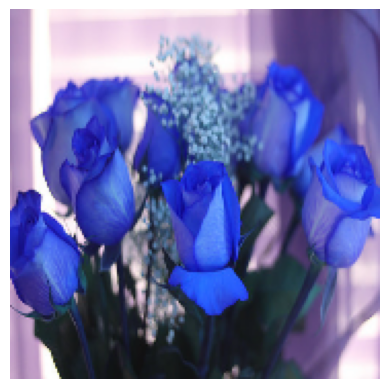

In [27]:
plt.axis('off')
plt.imshow(X[0])

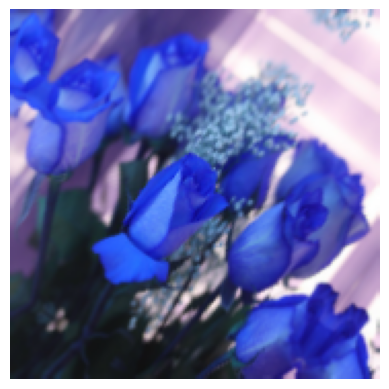

In [28]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [29]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 15s 27ms/step - loss: 1.3024 - accuracy: 0.4440
Epoch 2/30
86/86 [==============================] - 2s 27ms/step - loss: 1.0517 - accuracy: 0.5687
Epoch 3/30
86/86 [==============================] - 2s 27ms/step - loss: 0.9358 - accuracy: 0.6246
Epoch 4/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8572 - accuracy: 0.6577
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8141 - accuracy: 0.6759
Epoch 6/30
86/86 [==============================] - 2s 27ms/step - loss: 0.7926 - accuracy: 0.6882
Epoch 7/30
86/86 [==============================] - 2s 27ms/step - loss: 0.7288 - accuracy: 0.7235
Epoch 8/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6999 - accuracy: 0.7275
Epoch 9/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6766 - accuracy: 0.7431
Epoch 10/30
86/86 [==============================] - 3s 29ms/step - loss: 0.6517 - accuracy: 0.7518
Epoch 11

In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 17ms/step - loss: 0.9706 - accuracy: 0.7298


[0.9705642461776733, 0.7298474907875061]